In [301]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 💎 Data Preprossesing

In [302]:
df = pd.read_csv(r'F:\Machine Learning\DiamondPricePredictor\Diamond\diamonds.csv')

In [303]:
df.shape

(53940, 11)

In [304]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


🔶 Remove Unnnamed column

In [305]:
data = df.drop('Unnamed: 0', axis=1)

In [306]:
data.shape

(53940, 10)

In [307]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


🔶 Find null values

In [309]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [310]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

🔶 Remove duplicate

In [311]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [312]:
data[data.duplicated() == True]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [313]:
data =  data.drop_duplicates()
data.shape

(53794, 10)

🔶  Replacing min value with corresponding median value

In [314]:
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [315]:
data['x'] = data['x'].replace(0, data['x'].median())
data['y'] = data['y'].replace(0, data['y'].median())
data['z'] = data['z'].replace(0, data['z'].median())

In [316]:
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731956,5.735290,3.539960
std,0.47339,1.429909,2.233679,3988.114460,1.118786,1.139601,0.701893
min,0.20000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 💎 Data Visualization

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
def plot_data(col_data, col_name, data_type):
  plt.title(f'Distribution of {col_name}', fontsize = 12)
  if data_type == 'float64':
      sns.histplot(col_data, bins=50, kde=True, color='darkcyan')
      plt.show()
  elif data_type == 'object':
    sns.countplot(data=data, x=col_name, hue=col_name, palette='coolwarm', legend=False)
    plt.show()

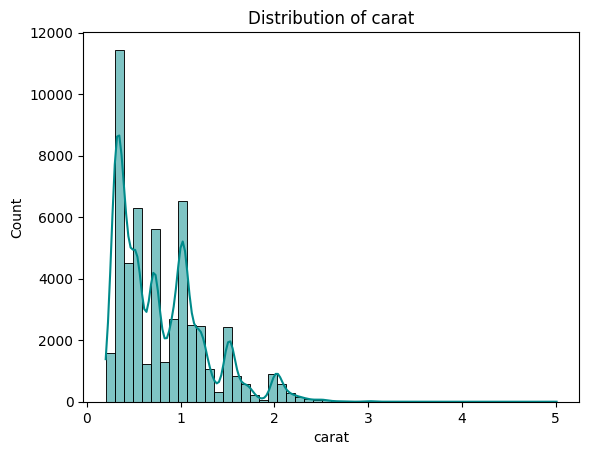

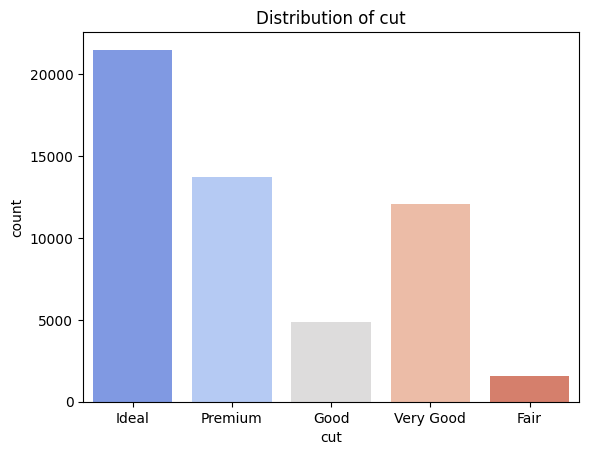

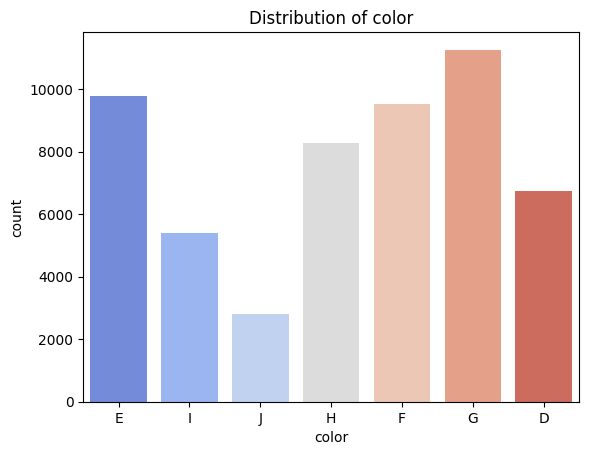

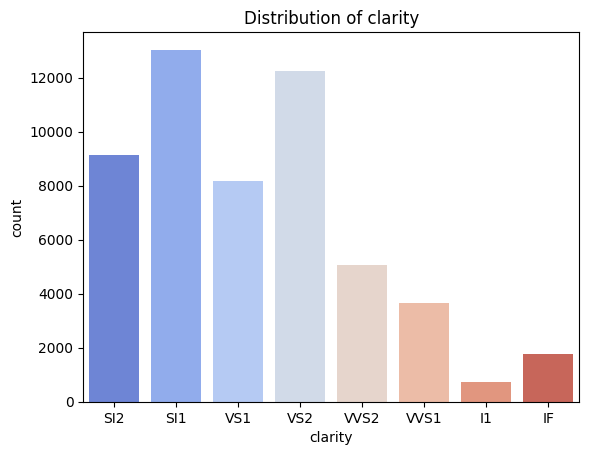

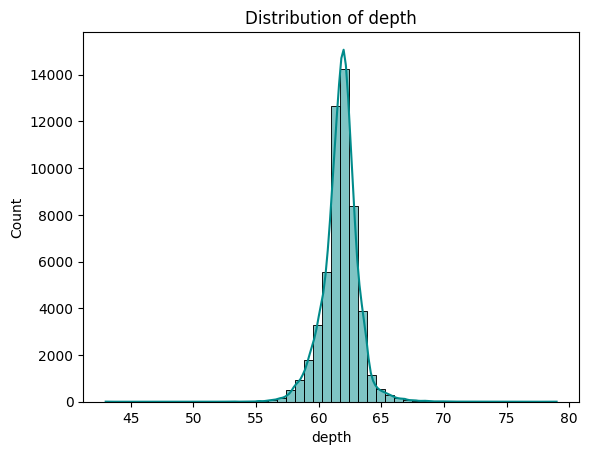

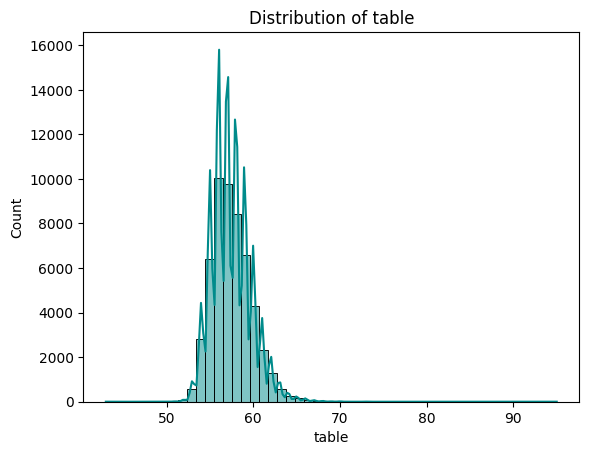

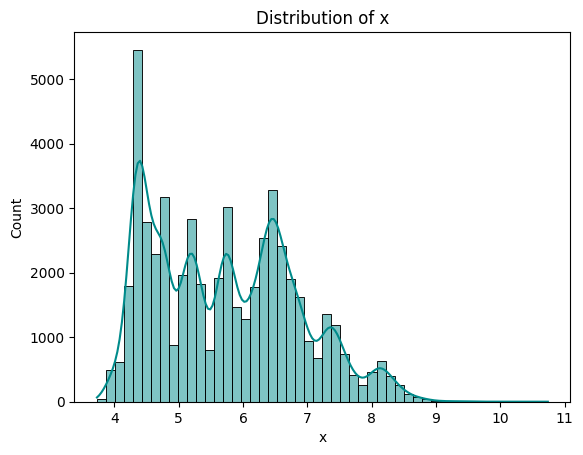

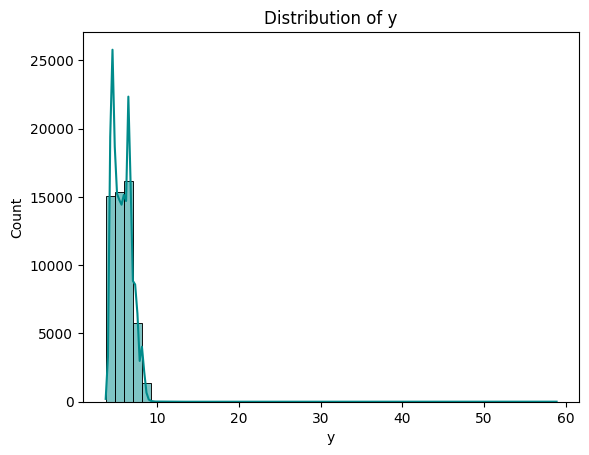

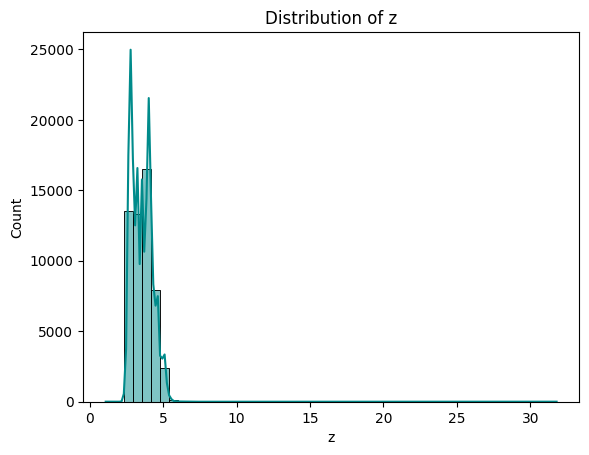

In [319]:
for i in range(0, len(data.columns)):
  plot_data(data[data.columns[i]], data.columns[i], data.dtypes[i].name)

📀 Cut - Mostly diamonds are in Ideal, Premium and Very Good categories

📀 Color - A higher frequency of diamonds are observed in G, H annd E, F color  

📀 Clarity - Diamonds are mostly in SI1 and VS2 calrity categories 

🔶 Mapping "clarity, cut, color" column to integer values

In [320]:
print(data['clarity'].unique())
print(data['cut'].unique())
print(data['color'].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [321]:
clarity_map = {
    'I1': 1, 'SI2': 2, 'SI1': 3,
    'VS2': 4, 'VS1': 5,
    'VVS2': 6, 'VVS1': 7, 'IF': 8
}
data['clarity'] = data['clarity'].map(clarity_map)

cut_map = {
    'Fair': 1, 'Good': 2, 'Very Good': 3,
    'Premium': 4, 'Ideal': 5
}
data['cut'] = data['cut'].map(cut_map)

color_map = {
    'J': 1, 'I': 2, 'H': 3,
    'G': 4, 'F': 5, 'E': 6, 'D': 7
}
data['color'] = data['color'].map(color_map)

data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [322]:
print(data['clarity'].unique())
print(data['cut'].unique())
print(data['color'].unique())

[2 3 5 4 6 7 1 8]
[5 4 2 3 1]
[6 2 1 3 5 4 7]


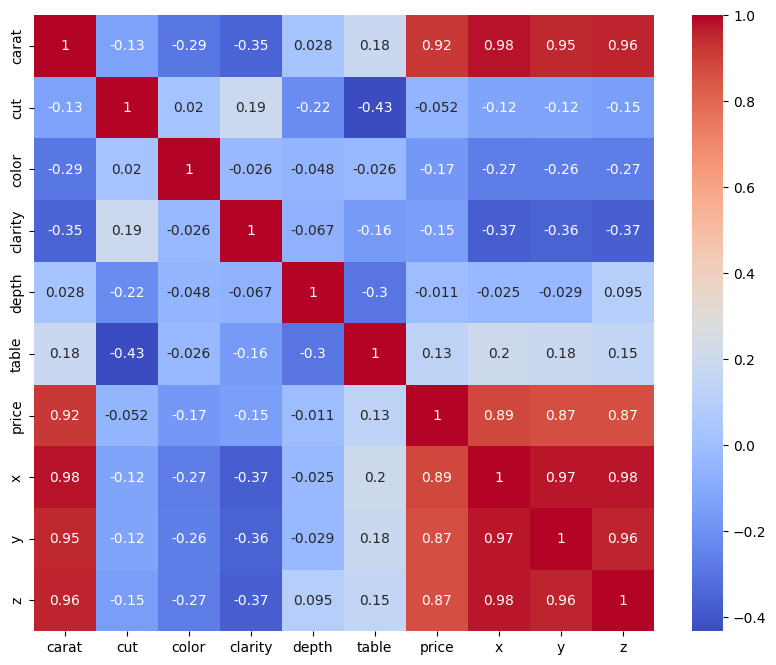

In [323]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

From the heatmap, we can see that all the features have either a positive or negative correlation with the price. However, the 'depth' feature has a very low correlation with the price, so dropping it will probably have a positive effect on our model's accuracy.

In [324]:
data = data.drop('depth', axis=1)

🔶 Box plot to detect outliers

In [325]:
data= data[data['carat'] < 1.9 ]
data = data[(data['table'] > 53 ) & (data['table'] < 61)]
data = data[data['x'] < 9.2]
data = data[data['y'] < 9.2]
data = data[(data['z'] < 5.8) & (data['z'] > 1.2)]
data

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,5,6,2,55.0,326,3.95,3.98,2.43
3,0.29,4,2,4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,58.0,2757,6.15,6.12,3.74


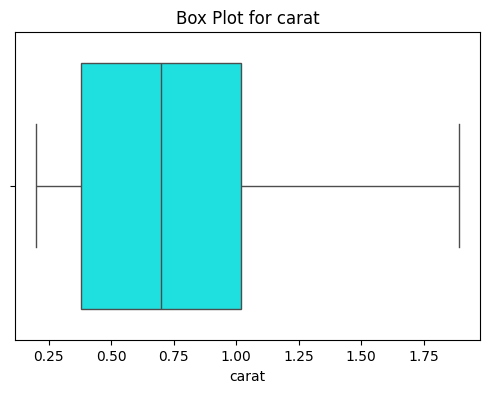

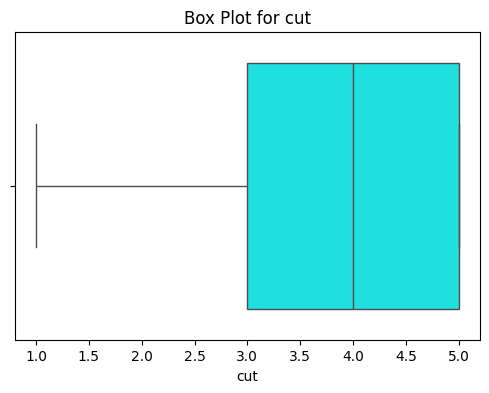

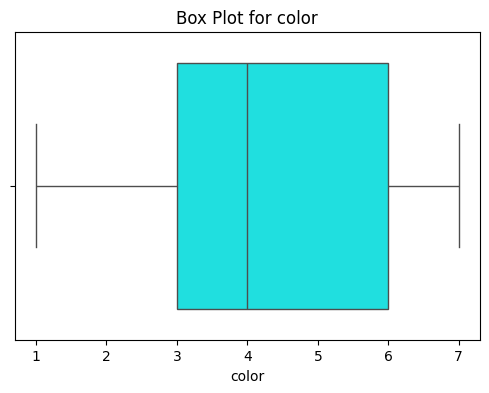

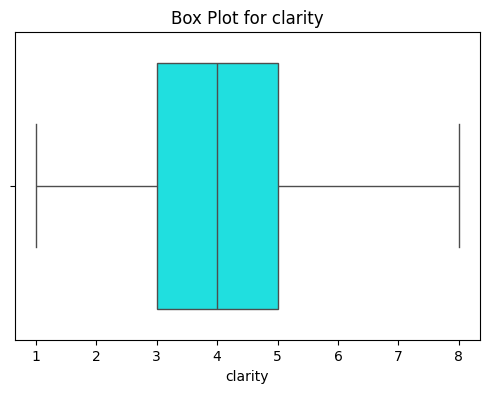

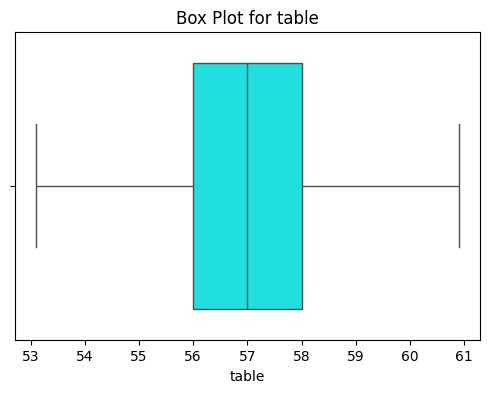

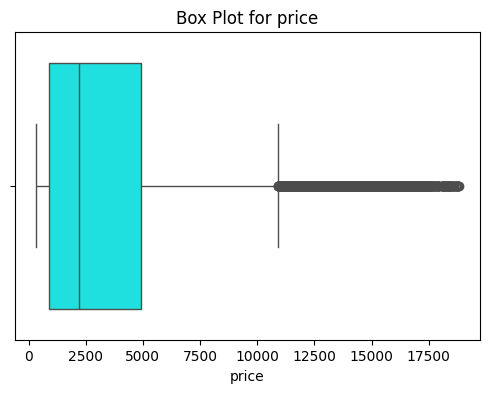

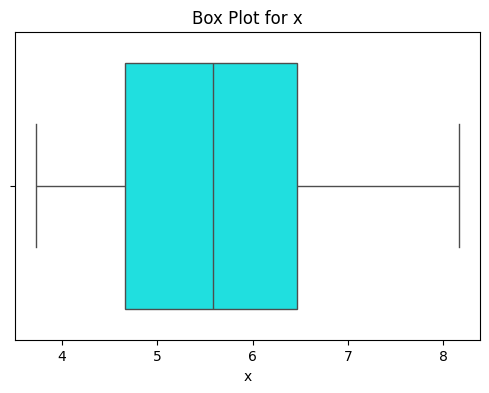

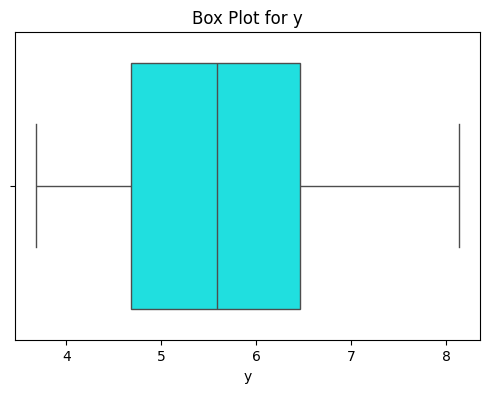

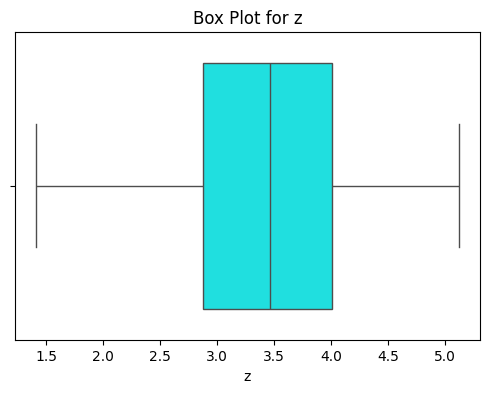

In [326]:
for feature in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature], color='cyan')
    plt.title(f'Box Plot for {feature}')
    plt.show()

🔶 Splitting Features & Output

In [327]:
X = data.drop(['price'] , axis=1 , inplace = False)
X

,carat,cut,color,clarity,table,x,y,z
0,0.23,5,6,2,55.0,3.95,3.98,2.43
3,0.29,4,2,4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,58.0,4.34,4.35,2.75
5,0.24,3,1,6,57.0,3.94,3.96,2.48
6,0.24,3,2,7,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,57.0,5.75,5.76,3.50
53936,0.72,2,7,3,55.0,5.69,5.75,3.61
53937,0.70,3,7,3,60.0,5.66,5.68,3.56
53938,0.86,4,3,2,58.0,6.15,6.12,3.74


In [328]:
y = data['price']
y

0         326
3         334
4         335
5         336
6         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 46533, dtype: int64

## 💎 Train the model

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (34899, 8)
X_test shape is  (11634, 8)
y_train shape is  (34899,)
y_test shape is  (11634,)


 🔶 Linear Regression

In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [332]:
LinearRegressionModel = make_pipeline(StandardScaler() ,LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1))
LinearRegressionModel.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1


In [333]:
y_pred = LinearRegressionModel.predict(X_test)

In [334]:
from sklearn.metrics import mean_squared_error, r2_score

In [335]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1034955.754128133


In [336]:
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train)*100,"%")
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test)*100,"%")

Linear Regression Train Score is :  90.13943125897165 %
Linear Regression Test Score is :  90.61524517947505 %


🔶 Random Forest Regression

In [337]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=44)
RandomForestRegressorModel.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [338]:
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train)*100,"%")
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test)*100,"%")

Random Forest Regressor Train Score is :  81.5614266109219 %
Random Forest Regressor Test Score is :  82.25058529705805 %


In [339]:
y_pred = RandomForestRegressorModel.predict(X_test)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1957414.8958095757


🔶 Decision Tree Rgeression

In [340]:
from sklearn.tree import DecisionTreeRegressor

In [341]:
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,33
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [342]:
y_pred = DecisionTreeRegressorModel.predict(X_test)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  1326295.608576115


In [343]:
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train)*100,"%")
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test)*100,"%")

DecisionTreeRegressor Train Score is :  87.99120660626546 %
DecisionTreeRegressor Test Score is :  87.97343842345093 %


🔶 KNN RegressionKNN Regression

In [344]:
from sklearn.neighbors import KNeighborsRegressor

In [345]:
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')
KNeighborsRegressorModel.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [346]:
y_pred = KNeighborsRegressorModel.predict(X_test)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  379839.5278631597


In [347]:
print("KNeighborsRegressorModel Train Score is : " , KNeighborsRegressorModel.score(X_train, y_train)*100,"%")
print("KNeighborsRegressorModel Test Score is : " , KNeighborsRegressorModel.score(X_test, y_test)*100,"%")

KNeighborsRegressorModel Train Score is :  97.76487541930119 %
KNeighborsRegressorModel Test Score is :  96.55569735621917 %


📀K-Nearest Neighbors (KNN) achieved the highest performance, with a train score of 97.76% and a test score of 96.55%

📀Linear Regression performed well, indicating a linear relationship between features and price,
   with a train score of 90.13% and a test score of 90.61%

📀Decision Tree Regressor showed reasonable accuracy, with a train score of 87.99% and
  a test score of 88.87.97%.

📀Random Forest Regressor delivered lower accuracy than expected, with a train score of 81.56% and 
  a test score of 82.25%, possibly due to overfitting or suboptimal hyperparameter settings